**K-Means Clustering**

**Rifqah Amaliyah (1301213241) -**



--------------------------------------------------------------------------------

Diberikan data centroid dan dataset sebagai berikut:
centroid 1 [5, 35] dan centroid 2 = [31, 33]

Dataset x1    -->   x1 = 3, 35, 30, 32, 37, 24, 27, 8, 22, 34

Dataset x2   -->    x2 = 35, 5, 30, 32, 40, 36, 5, 6, 32, 31

Lakukanlah proses clustering dengan algoritma K-Means sebanyak 4 iterasi, dimana perhitungan jarak dilakukan dengan menggunakan metode Euclidean Distance. Setelah dilakukan clustering sebanyak 4 iterasi, tuliskan keanggotaan kelas untuk masing-masing data diatas.



________________________________________________________________________________

Langkah Kerja :

In [49]:
# Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import warnings
from sklearn.cluster import KMeans

**1. OUTLIER DATA**


>  Algoritma K-Means sensitif terhadap pencilan. Pencilan dapat memiliki pengaruh yang besar pada perhitungan centroid dan dapat mempengaruhi hasil clustering secara signifikan. Oleh karena itu, penting untuk mengidentifikasi dan memperlakukan pencilan sebelum menjalankan algoritma K-Means.



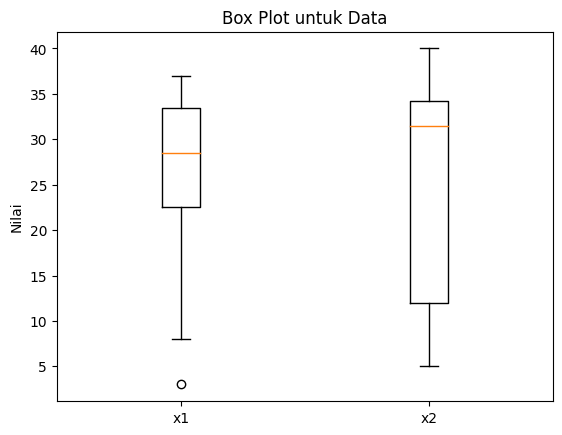

In [43]:
# Dataset
x1 = np.array([3, 35, 30, 32, 37, 24, 27, 8, 22, 34])
x2 = np.array([35, 5, 30, 32, 40, 36, 5, 6, 32, 31])

# Menggabungkan kedua variabel menjadi satu array 2D
data_for_clustering = np.array(list(zip(x1, x2)))

# Membuat Box Plot
plt.boxplot(data_for_clustering, labels=['x1', 'x2'])
plt.title('Box Plot untuk Data')
plt.ylabel('Nilai')
plt.show()


> Dari boxplot ini terlihat bahwa hanya terdapat 1 data pencilan. Diputuskan untuk tidak memproses pencilan tersebut dan tetap memasukkannya dalam clustering K-Means



**2. HOPKINS STATISTIC**


> Uji Hopkins Statistic adalah suatu metode statistik yang digunakan untuk mengevaluasi apakah suatu dataset cocok untuk proses clustering atau tidak. Tujuan dari uji ini adalah untuk mengukur sejauh mana dataset memiliki struktur yang terorganisir atau apakah data cenderung bersifat acak.


In [44]:
# Fungsi Hopkins Statistic
def hopkins_statistic(data, num_samples=100):
    n = len(data)
    d = data.shape[1]

    # Menghasilkan data acak
    random_data = np.random.rand(num_samples, d)

    # Menghitung jarak antara pasangan data asli dan pasangan data acak
    nn_original = NearestNeighbors(n_neighbors=2).fit(data)
    nn_random = NearestNeighbors(n_neighbors=1).fit(random_data)

    u, _ = nn_original.kneighbors(data, 2)
    w = np.sum(u[:, 1])

    v, _ = nn_random.kneighbors(random_data, 2)
    w_rand = np.sum(v[:, 0])

    # Hopkins Statistic
    hopkins_stat = w / (w + w_rand)

    return hopkins_stat

# Dataset
x1 = [3, 35, 30, 32, 37, 24, 27, 8, 22, 34]
x2 = [35, 5, 30, 32, 40, 36, 5, 6, 32, 31]

# Menggabungkan kedua variabel menjadi satu array 2D
data_for_clustering = np.array(list(zip(x1, x2)))

# Menghitung Hopkins Statistic untuk dataset
hopkins_value = hopkins_statistic(data_for_clustering)

print(f"Hopkins Statistic Value: {hopkins_value}")

# Menilai apakah data cocok untuk clustering
if hopkins_value < 0.5:
    print("Data cenderung tidak cocok untuk clustering (homogen).")
else:
    print("Data cenderung cocok untuk clustering (heterogen).")


Hopkins Statistic Value: 1.0
Data cenderung cocok untuk clustering (heterogen).


**3.UJI ELBOW METHOD**

> Metode Elbow adalah suatu teknik yang digunakan dalam analisis clustering untuk menentukan jumlah kluster yang optimal untuk suatu dataset.



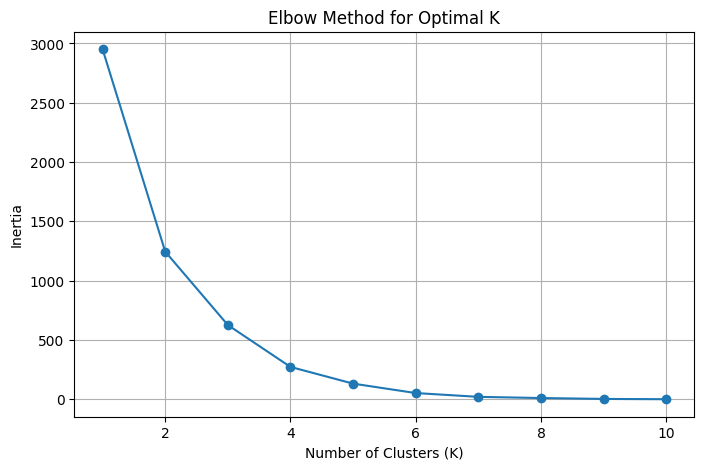

In [45]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Dataset
x1 = [3, 35, 30, 32, 37, 24, 27, 8, 22, 34]
x2 = [35, 5, 30, 32, 40, 36, 5, 6, 32, 31]
data_for_clustering = np.array(list(zip(x1, x2)))

# Menentukan jumlah kluster yang akan diuji (dari 1 hingga 10)
num_clusters = range(1, 11)
inertia = []

# Menghitung inersia untuk setiap jumlah kluster
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()




> Dari grafik diatas dapat dilihat bahwa elbow berada pada titik 2. ini sudah sesuai dengan arahan dari tugas ini yaitu membagi kelas/cluster data menajdi 2



**4. K-MEANS & VISUALISASI**

Bagian ini akan berisi implementasi dari algoritma K-Means clustering dalam bahasa Python menggunakan library NumPy dan Matplotlib. Berikut adalah deskripsi singkat dari setiap bagian dalam kode tersebut:


a. Fungsi Euclidean Distance:

> Euclidean_distance adalah fungsi yang menghitung jarak Euclidean antara dua titik dalam ruang dua dimensi. Fungsi ini digunakan untuk mengukur seberapa jauh titik dari centroid kluster.



b. Fungsi K-Means:

> K-Means adalah fungsi utama untuk menjalankan algoritma K-Means clustering. Fungsi ini menerima input berupa dua dimensi data (x1 dan x2), inisialisasi centroid awal (centroid1 dan centroid2), dan jumlah iterasi (iterations).
Pada setiap iterasi, fungsi menghitung jarak Euclidean dari setiap titik data ke kedua centroid, kemudian mengassign titik ke kluster dengan centroid terdekat.

> Centroid diupdate berdasarkan rata-rata dari titik-titik dalam kluster. Visualisasi dilakukan setiap iterasi untuk menunjukkan perubahan kluster dan centroid.


c. Inisialisasi Dataset dan Centroid Awal:
> x1 dan x2 adalah array NumPy yang menyimpan data dua dimensi yang akan di-cluster.
init_centroid1 dan init_centroid2 adalah array NumPy yang menyimpan inisialisasi centroid awal.

d. Jalankan K-Means:
>K-Means dijalankan dengan memanggil fungsi k_means dengan parameter dataset, centroid awal, dan jumlah iterasi. Setelah selesai iterasi, hasil akhir dari kluster ditampilkan menggunakan scatter plot. Titik-titik diplot berdasarkan keanggotaan kluster, dan centroid awal ditandai dengan 'X' berwarna merah dan biru.







ITERATION 1:
Assigned Class: [1 2 2 2 2 2 2 1 2 2]
Old Centroid 1: [ 5 35]
Old Centroid 2: [31 33]
New Centroid 1: [ 5.5 20.5]
New Centroid 2: [30.125 26.375]



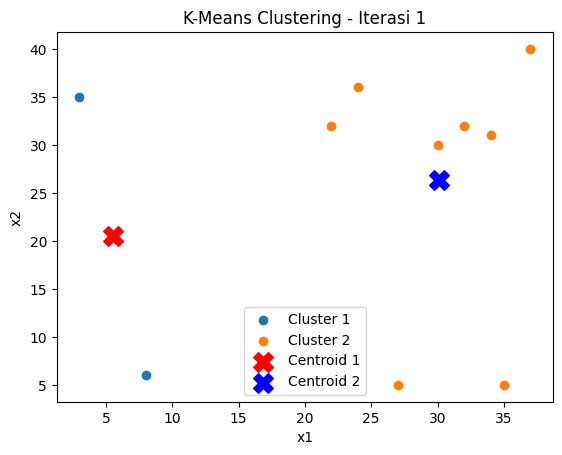

----------------------------------------------------------------------------------------

ITERATION 2:
Assigned Class: [1 2 2 2 2 2 2 1 2 2]
Old Centroid 1: [ 5.5 20.5]
Old Centroid 2: [30.125 26.375]
New Centroid 1: [ 5.5 20.5]
New Centroid 2: [30.125 26.375]



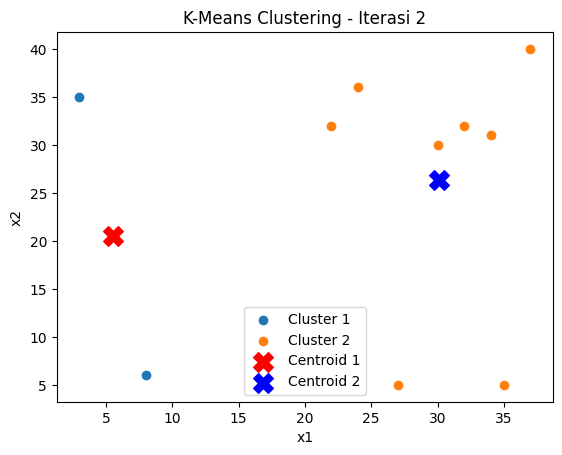

----------------------------------------------------------------------------------------

ITERATION 3:
Assigned Class: [1 2 2 2 2 2 2 1 2 2]
Old Centroid 1: [ 5.5 20.5]
Old Centroid 2: [30.125 26.375]
New Centroid 1: [ 5.5 20.5]
New Centroid 2: [30.125 26.375]



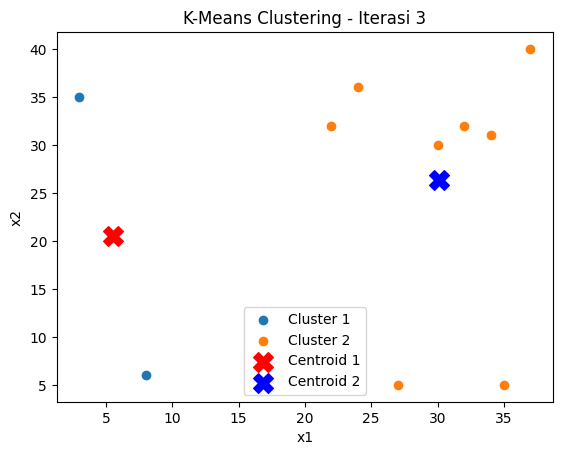

----------------------------------------------------------------------------------------

ITERATION 4:
Assigned Class: [1 2 2 2 2 2 2 1 2 2]
Old Centroid 1: [ 5.5 20.5]
Old Centroid 2: [30.125 26.375]
New Centroid 1: [ 5.5 20.5]
New Centroid 2: [30.125 26.375]



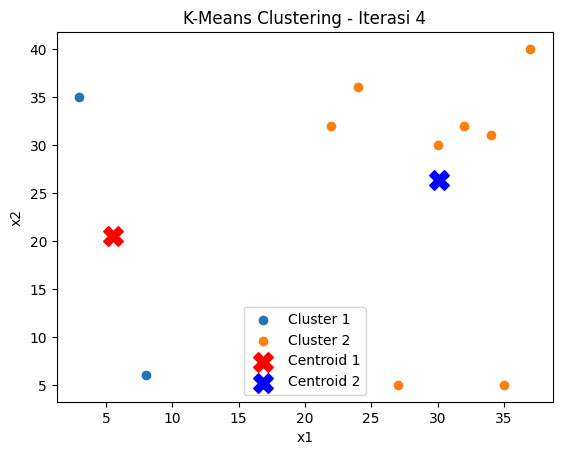

----------------------------------------------------------------------------------------



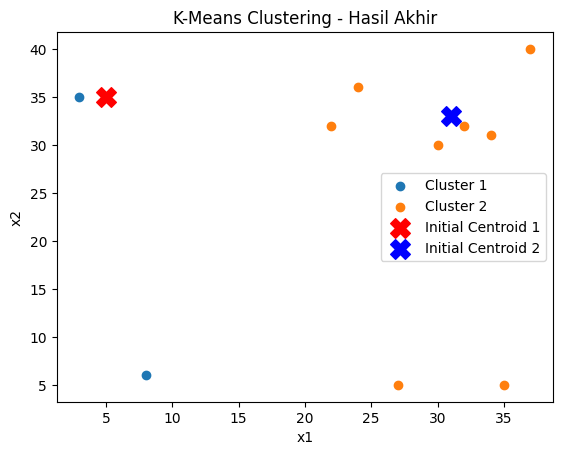

In [48]:
# Fungsi Euclidean Distance
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

# Fungsi K-Means
def k_means(x1, x2, centroid1, centroid2, iterations):
    for iteration in range(iterations):
        # Hitung jarak Euclidean
        distance_to_c1 = np.array([euclidean_distance(np.array([x1[i], x2[i]]), centroid1) for i in range(len(x1))])
        distance_to_c2 = np.array([euclidean_distance(np.array([x1[i], x2[i]]), centroid2) for i in range(len(x1))])

        # Assign ke Kelas Terdekat
        assigned_class = np.where(distance_to_c1 < distance_to_c2, 1, 2)

        # Tampilkan hasil setiap iterasi
        print(f"ITERATION {iteration + 1}:")
        print("Assigned Class:", assigned_class)

        # Update Centroid
        new_centroid1 = np.array([np.mean(x1[assigned_class == 1]), np.mean(x2[assigned_class == 1])])
        new_centroid2 = np.array([np.mean(x1[assigned_class == 2]), np.mean(x2[assigned_class == 2])])

        print("Old Centroid 1:", centroid1)
        print("Old Centroid 2:", centroid2)
        print("New Centroid 1:", new_centroid1)
        print("New Centroid 2:", new_centroid2)
        print("")


        # Perbarui nilai centroid
        centroid1, centroid2 = new_centroid1, new_centroid2

        # Visualisasi letak centroid dan keanggotaan kelas
        plt.scatter(x1[assigned_class == 1], x2[assigned_class == 1], label='Cluster 1')
        plt.scatter(x1[assigned_class == 2], x2[assigned_class == 2], label='Cluster 2')
        plt.scatter(*centroid1, marker='X', s=200, c='red', label='Centroid 1')
        plt.scatter(*centroid2, marker='X', s=200, c='blue', label='Centroid 2')
        plt.title(f'K-Means Clustering - Iterasi {iteration + 1}')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.show()
        print("----------------------------------------------------------------------------------------")
        print("")

    return assigned_class

# Dataset
x1 = np.array([3, 35, 30, 32, 37, 24, 27, 8, 22, 34])
x2 = np.array([35, 5, 30, 32, 40, 36, 5, 6, 32, 31])

# Inisialisasi centroid
init_centroid1 = np.array([5, 35])
init_centroid2 = np.array([31, 33])

# Jalankan K-Means dengan 4 iterasi
assigned_class_final = k_means(x1, x2, init_centroid1, init_centroid2, iterations=4)

# Visualisasi keanggotaan kelas akhir
plt.scatter(x1[assigned_class_final == 1], x2[assigned_class_final == 1], label='Cluster 1')
plt.scatter(x1[assigned_class_final == 2], x2[assigned_class_final == 2], label='Cluster 2')
plt.scatter(*init_centroid1, marker='X', s=200, c='red', label='Initial Centroid 1')
plt.scatter(*init_centroid2, marker='X', s=200, c='blue', label='Initial Centroid 2')
plt.title('K-Means Clustering - Hasil Akhir')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


5. ANALISIS HASIL


> Hasil diatas menunjukkan bahwa proses clustering menggunakan metode k-means telah konvergen pada iterasi ke-2. Ini terlihat dari fakta bahwa pusat klaster (centroid) tidak berubah antara iterasi ke-2, ke-3, dan ke-4. Hasil klasifikasi atau alokasi kelas untuk setiap titik data juga  tidak mengalami perubahan setelah iterasi kedua.


> Posisi akhir Centroid1 = [5.5, 20.5]

> Posisi akhir Centroid2 =  [30.125, 26.375]



> Data Cluster 1 = [5, 35], [8, 6]



> Data Cluster 2 = [35, 5], [30, 30] , [32, 32], [37, 40], [24, 36], [27, 5], [22, 32], [34, 31]





